# Gaussian Compositions

In the lectures, we saw that the distribution of the sum of two Gaussian distributions, is another Gaussian distribution. 

Specifically, if $X\sim\phi(X;\mu_{X},\sigma_{X})$ and $Y\sim\phi(Y;\mu_Y,\sigma_Y)$, 

then, 

$$(X+Y)=U \sim \phi\left(U;\mu_{U}=mu_{X}+\mu_{Y}, \sigma_Z=\sqrt{\sigma_{X}^{2}+\sigma_{Y}^{2}}\right)$$

We can check this for an example. Let $\mu_{X}=10$, $\mu_{Y}=-6$, $\sigma_{X}=1$, $\sigma_{Y}=0.5$.

We can generate toys from the two Gaussians, sum them and plot a histogram of the distribution.

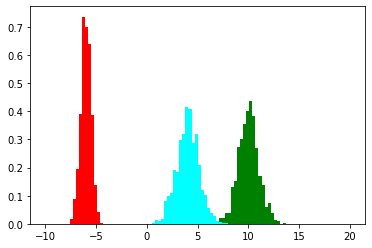

In [6]:
import numpy
import matplotlib.pyplot as plt

def gaus(x,mu,sigma):
    A = (1./(sigma*(2*numpy.math.pi)**0.5))
    B = numpy.math.exp(-(x-mu)*(x-mu)/(2*sigma*sigma)) 
    return A*B

muX, sigmaX = 10., 1. 
muY, sigmaY = -6., 0.5

# generate toy values from the two Gaussian distributions and sum
toys_X = numpy.random.normal(muX,sigmaX,1000)
toys_Y = numpy.random.normal(muY,sigmaY,1000) 
toys_U = toys_X+toys_Y

# plot the toys and compare to the expected Gaussian distributions
x = numpy.arange(-10,20,0.1)
plt.hist(toys_X,100,(-10,20),density=True,color='green') 
plt.hist(toys_Y,100,(-10,20),density=True,color='red') 
plt.hist(toys_U,100,(-10,20),density=True,color='cyan')
plt.show()

According to our calculation for the sum of two Gaussian variables,  we should have that


In [7]:
mu = muX + muY
sigma = ((sigmaX)**2 + (sigmaY)**2)**0.5 

Let's check!

mu=4.0, sigma=1.1


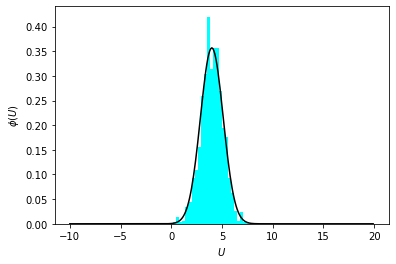

In [3]:
plt.hist(toys_U,100,(-10,20),density=True,color='cyan')
plt.plot(x,[gaus(xx,mu,sigma) for xx in x],color='black')
print("mu=%.1f, sigma=%.1f"%(mu,sigma)) 
plt.xlabel("$U$")
plt.ylabel("$\\phi(U)$") 
plt.show()

So this is where your error propagation formula comes from. Its simply saying that for two independent gaussian distributed random variables, the variance of the sum of them is also a gaussian with a variance equal to the sum of the individual variances.

What about the ratio, where $U=\frac{X}{Y}$? You probably learned something like the following to calculate the standard deviation, 

$$
\sigma_{U} = U\sqrt{\left(\frac{\sigma_{X}}{X}\right)^{2}+\left(\frac{\sigma_{Y}}{Y}\right)^{2}}
$$

What if $X\sim\phi(X;\mu_{X},\sigma_{X})$ and $Y\sim\phi(Y;\mu_Y,\sigma_Y)$, with $\mu_{X}=\mu_{Y}=0$ and $\sigma_{X}=\sigma_{Y}=1$? 

Let's have a look at what our toys give us. 

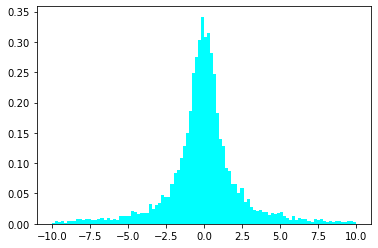

In [8]:
# generate toy values from the two Gaussian distributions and take the ratio
toys_X = numpy.random.normal(0,1,10000)
toys_Y = numpy.random.normal(0,1,10000) 
toys_U = toys_X/toys_Y

plt.hist(toys_U,100,(-10,10),density=True,color='cyan')
plt.show()

This doesn't look very Gaussian. In fact its not, this follows a *Cauchy* distribution, 

$$ 
U \sim \frac{1}{\pi\left(1+U^{2}\right)}
$$

We can overlay the distribution to check it, 

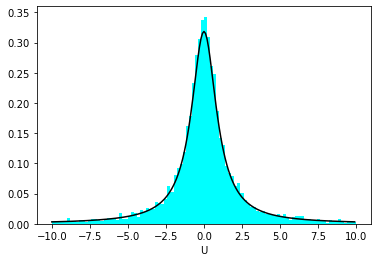

In [5]:
def cauchy(U):
    return 1./(numpy.pi*(1+U*U))

x = numpy.arange(-10,10,0.1)
plt.hist(toys_U,100,(-10,10),density=True,color='cyan')
plt.plot(x,[cauchy(xx) for xx in x],color='black')
plt.xlabel("U")
plt.show()

This distribution as an *undefined mean* and an *infinite variance*! so just be careful with error propagation formula. We'll cover more on uncertainties in this lecture course. 